In [1]:
#Instalación de librerias necesarias
!pip install contractions
!pip install inflect
!pip install pandas-profiling==2.7.1

In [2]:
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/Santiago_Talero/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#Instalacion de paquetes especificos de manejo de textos
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('wordnet_ic')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Santiago_Talero/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/Santiago_Talero/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet_ic to
[nltk_data]     /Users/Santiago_Talero/nltk_data...
[nltk_data]   Package wordnet_ic is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/Santiago_Talero/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
from statistics import mode, multimode
from pandas_profiling import ProfileReport

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt

In [75]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('/Users/Santiago_Talero/Desktop/Proyecto Etapa 1/datos25k.csv', sep=',', encoding = 'utf-8', index_col=0)
data["words"]=[str(i).split(' ') for i in textos['words']]
# Asignación a una nueva variable de los datos leidos
data_t=data

In [32]:
textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['text']]
textos['Moda'] = [[mode([x for x in str(i).split(' ')])] for i in textos['words']]
textos['Moda'] = textos['Moda'].astype("string")
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['text']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['text']]

# Se realiza un perfilamiento de los datos con la librería pandas profiling
profile=ProfileReport(textos)
profile

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
#Guardando archivo de perfilamiento de los datos
profile.to_file("perfilamientoDatos.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if not word in stopwords.words():
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [37]:
data_t.iloc[144603]["text"]= data_t.iloc[144603]["text"].replace("İ", "I")
data_t['text'] = data_t['text'].apply(contractions.fix) #Aplica la corrección de las contracciones

In [38]:
#Por rangos

#data_t['words'][20000:25000] = data_t['text'][20000:25000].apply(word_tokenize).apply(preprocessing)
#data_t['words'][15999:16000] = data_t['text'][15999:16000].apply(word_tokenize).apply(preprocessing)

#A todos los datos
#data_t['words'] = data_t['text'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido

In [53]:
data_c=data_t.copy()
data_t=data_t.iloc[0:25000]

data_t.shape

(25000, 3)

In [78]:
#Lemm y Stemm
ps = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_words(words):
    """Stem words in list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(ps.stem(word))
    return new_words

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word))
    return new_words

def stem_and_lemmatize(words):
    words = stem_words(words)
    words = lemmatize_verbs(words)
    return words


data_t['words'] = data_t['words'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.

In [79]:
#Cambiando formatos
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t

text        class  \
Unnamed: 0                                                                   
173271      i want to destroy myselffor once everything wa...      suicide   
336321      I kind of got behind schedule with learning fo...  non-suicide   
256637      I am just not sure anymoreFirst and foremost: ...      suicide   
303772      please give me a reason to liveThats too much ...      suicide   
293747      27f struggling to find meaning moving forwardI...      suicide   
...                                                       ...          ...   
6163        Everything is too hardI feel so overwhelemd by...      suicide   
217588      American football sucks It looks like a mistra...  non-suicide   
319299      What is one of the best dreams you have had? I...  non-suicide   
32869       I did not asked to be here\nObviously, nobody ...      suicide   
169948      I seriously do not want to be aliveSo many tho...      suicide   

                                                        words  
Unnamed: 0                                                     
173271      destroy myselff start feel tumbl cop reason te...  
336321      kind schedule learn week testweek test study s...  
256637      anymorefirst foremost brazil judg doct form de...  
303772      giv reason live reason liv anym feel infery se...  
293747      27f struggling find mean mov forward admit bit...  
...                                                       ...  
6163        hard feel overwhelemd feel singl day handl han...  
217588      am footb suck mistransl rugby fuck cal footb b...  
319299      dream week ago liv cabin onlin friend snow sta...  
32869       ask ask born world fourteen year simply put ob...  
169948      aliveso thought head handl distract thing feel...  

[25000 rows x 3 columns]

In [80]:
#Seleccion datos de entrenamiento y test
X_data, y_data = data_t['words'],data_t['class']
y_data = (y_data == 'suicide').astype(int)
y_data

Unnamed: 0
173271    1
336321    0
256637    1
303772    1
293747    1
         ..
6163      1
217588    0
319299    0
32869     1
169948    1
Name: class, Length: 25000, dtype: int64

In [81]:
#Vectorizando tokens
vectorizer = TfidfVectorizer() 
vectors = vectorizer.fit_transform(X_data)
vectors

<25000x30065 sparse matrix of type '<class 'numpy.float64'>'
	with 740008 stored elements in Compressed Sparse Row format>

In [82]:
#VISUALIZACION DE LOS VECTORES
tf_idf = pd.DataFrame(vectors.todense()).iloc[:5]  
tf_idf.columns = vectorizer.get_feature_names_out()
tfidf_matrix = tf_idf.T
tfidf_matrix.columns = ['response'+ str(i) for i in range(1, 6)]
tfidf_matrix['count'] = tfidf_matrix.sum(axis=1)

# Top 10 words 
tfidf_matrix = tfidf_matrix.sort_values(by ='count', ascending=False)[:25] 

# Print the first 10 words 
print(tfidf_matrix.head(25))

              response1  response2  response3  response4  response5     count
study          0.000000   0.425279   0.116740   0.000000   0.000000  0.542019
feel           0.090134   0.000000   0.106208   0.161907   0.131726  0.489974
testweek       0.000000   0.450737   0.000000   0.000000   0.000000  0.450737
dream          0.000000   0.000000   0.111592   0.000000   0.332170  0.443762
hard           0.000000   0.153922   0.084504   0.000000   0.167693  0.406120
reason         0.139816   0.000000   0.000000   0.251150   0.000000  0.390966
start          0.126396   0.000000   0.148937   0.000000   0.110834  0.386167
myselff        0.383124   0.000000   0.000000   0.000000   0.000000  0.383124
infery         0.000000   0.000000   0.000000   0.370846   0.000000  0.370846
tumbl          0.351384   0.000000   0.000000   0.000000   0.000000  0.351384
cop            0.202250   0.000000   0.119159   0.000000   0.000000  0.321409
shred          0.319978   0.000000   0.000000   0.000000   0.000

In [ ]:
#GUARDANDO DATOS PROCESADOS
data_t.to_csv("/Users/Santiago_Talero/Desktop/Proyecto Etapa 1/datos25k.csv", sep=',', encoding = 'utf-8')

In [83]:
#CONVIRTIENDO A DATAFRAME
copia=vectors
copia=pd.DataFrame.sparse.from_spmatrix(copia)
copia.head(7)
#copia.to_csv("/Users/Santiago_Talero/Desktop/Proyecto Etapa 1/vectores.csv", sep=',', encoding = 'utf-8')

0      1      2      3      4      5      6      7      8      9      ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
5    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
6    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

   30055  30056  30057  30058  30059  30060  30061  30062  30063  30064  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
5    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
6    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[7 rows x 30065 columns]

In [ ]:
#CONSTRUYENDO EL MEJOR ARBOL DE DECISION

X_train, X_test, Y_train, Y_test = train_test_split(copia, y_data, test_size=0.3, random_state=0)

particiones = KFold(n_splits=10, shuffle=True, random_state = 0)
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,6,8,10,20],'min_samples_split':[2, 3, 4, 5]}

arbol = DecisionTreeClassifier(random_state=0)

mejor_arbol = GridSearchCV(arbol, param_grid, cv=particiones)
mejor_arbol.fit(X_train, Y_train)

print(mejor_arbol.best_params_)
arbol_final = mejor_arbol.best_estimator_

y_pred_train = arbol_final.predict(X_train)
y_pred_test = arbol_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

print(classification_report(Y_test, y_pred_test))

In [84]:
#SELECCIONANDO EL MEJOR ARBOL
X_train, X_test, Y_train, Y_test = train_test_split(copia, y_data, test_size=0.3, random_state=0)

arbol = DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_split=4)

arbol.fit(X_train, Y_train)

y_pred_train = arbol.predict(X_train)
y_pred_test = arbol.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))


Exactitud sobre entrenamiento: 0.93
Exactitud sobre test: 0.85


/Users/Santiago_Talero/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


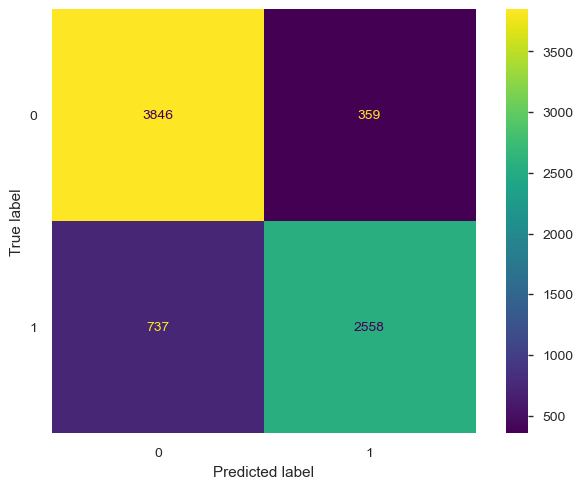

Exactitud: 0.85
Recall: 0.9146254458977408
Precisión: 0.8391883046039712
Puntuación F1: 0.8752844788347748


In [85]:
#METRICAS DE RENDIMIENTO
plot_confusion_matrix(arbol, X_test, Y_test)  
plt.show()  

#DATOS DE RENDIMIENTO
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred_test))
print("Recall: {}".format(recall_score(Y_test,y_pred_test,pos_label=0)))
print("Precisión: {}".format(precision_score(Y_test,y_pred_test,pos_label=0)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred_test,pos_label=0)))

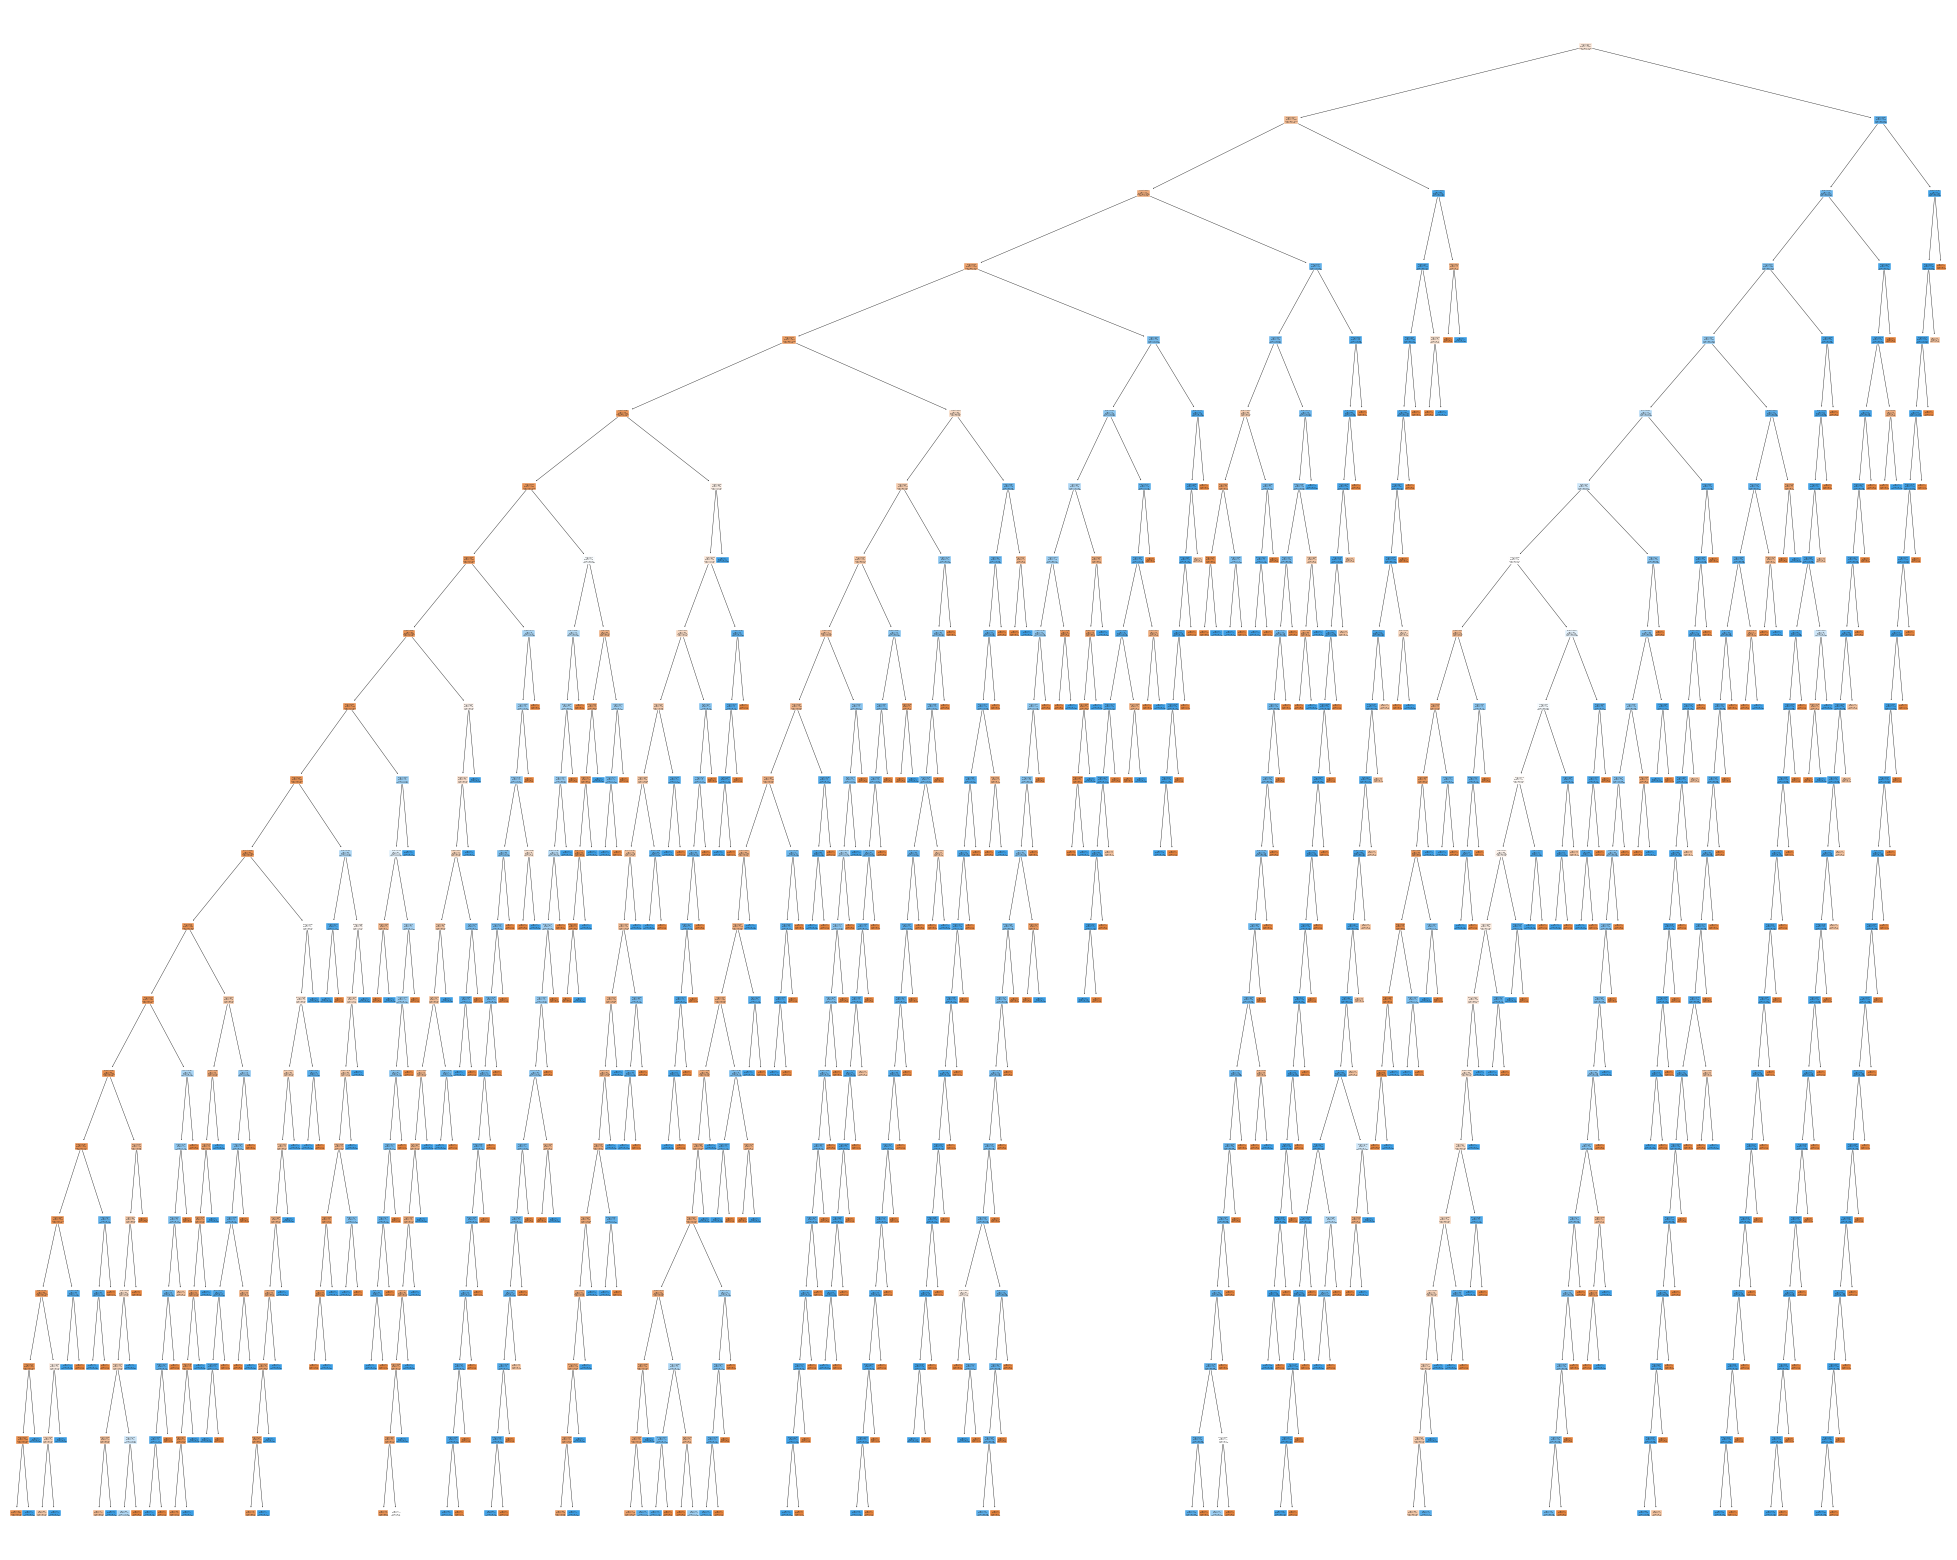